Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
                      

In [256]:
excel_file = 'Deleted_report-Mercedes-Benz of Hoffman Estates-2019-01-19-0610.xls'
df = pd.read_excel(excel_file)
df.dropna(subset=['Price'])
df.head()

,Red/Black,Carfax Has Report,Carfax Has Manufacturer Recall,Carfax Has Warnings,Carfax Has Problems,Photos,Autowriter Description,Year,Vehicle,Stock #,...,Last $ Change,Book,Cost,Water,Markup,Odometer,Overall,Like Mine,Price Rank Description,vRank Description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018 Mercedes-Benz GLS 450 4MATIC®,385234,...,2018-01-04 09:45:32.195,NaN,76514.0,NaN,-350.0,45.0,NaN,NaN,Unranked,Unranked
1,NaN,Yes,NaN,NaN,NaN,NaN,Yes,2015,2015 Mercedes-Benz C-Class C 300 4MATIC®,HF2924,...,NaT,17874.0,NaN,NaN,NaN,47525.0,35.0,33.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018 Mercedes-Benz S-Class S 450 4MATIC®,385262,...,2018-01-24 15:15:38.353,NaN,NaN,NaN,NaN,42.0,NaN,NaN,Unranked,Unranked
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,2017 Mercedes-Benz Sprinter 3500,72367,...,2018-02-07 14:33:40.383,39546.0,NaN,NaN,NaN,5.0,NaN,NaN,Unranked,Unranked
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,2014 Mercedes-Benz M-Class ML 350 4MATIC®,HC2474,...,2018-04-03 15:56:33.109,NaN,NaN,NaN,NaN,45642.0,NaN,NaN,Unranked,Unranked


In [257]:
df.describe()

,Red/Black,Photos,Year,Status,Age,Price,Default % of Market,Book,Cost,Water,Markup,Odometer,Overall,Like Mine
count,0.0,120.000000,2174.000000,0.0,2174.000000,1879.000000,1070.000000,1536.000000,2009.000000,1454.000000,1751.000000,2136.000000,1385.000000,1275.000000
mean,NaN,37.741667,2015.756670,NaN,44.999540,47652.657265,0.977096,29401.794271,41691.962668,6209.804677,897.374072,25193.669944,75.168231,75.105882
std,NaN,1.803339,3.463057,NaN,48.331703,21481.115158,0.052224,17054.939781,23689.764625,8261.726335,8704.026693,37088.196311,30.386715,44.660614
min,NaN,33.000000,1992.000000,NaN,1.000000,1302.000000,0.802153,332.000000,-775.000000,-75248.000000,-64646.000000,3.000000,16.000000,16.000000
25%,NaN,37.000000,2015.000000,NaN,13.000000,32829.000000,0.946364,19020.500000,27620.000000,3270.250000,-1048.500000,13.000000,55.000000,47.000000
50%,NaN,38.000000,2017.000000,NaN,30.000000,44995.000000,0.977352,28055.000000,42340.000000,6100.500000,-375.000000,6767.500000,70.000000,65.000000
75%,NaN,39.000000,2018.000000,NaN,60.000000,57603.000000,1.006760,38835.000000,54578.000000,9939.000000,1093.000000,36021.750000,87.000000,90.000000
max,NaN,42.000000,2019.000000,NaN,503.000000,203000.000000,1.196052,118469.000000,205250.000000,60372.000000,159201.000000,263738.000000,330.000000,653.000000


In [258]:
df.groupby('Year').describe()

Age                                                          Book  \
      count       mean        std   min    25%   50%    75%    max  count   
Year                                                                        
1992    2.0   8.000000   1.414214   7.0   7.50   8.0   8.50    9.0    2.0   
1999    1.0  73.000000        NaN  73.0  73.00  73.0  73.00   73.0    1.0   
2000    1.0  15.000000        NaN  15.0  15.00  15.0  15.00   15.0    1.0   
2001    8.0  13.250000   8.598173   6.0   8.75   9.5  14.00   28.0    8.0   
2002    6.0  20.166667   9.042492  10.0  14.00  18.0  26.50   33.0    6.0   
2003    5.0  12.200000   4.604346   8.0   8.00  12.0  14.00   19.0    5.0   
2004   14.0  16.642857  10.262757   7.0   9.25  14.0  19.75   41.0   14.0   
2005   18.0  14.833333   8.991826   3.0   8.25  13.5  17.00   36.0   18.0   
2006   22.0  10.863636   5.365635   4.0   8.00  10.0  13.50   29.0   22.0   
2007   32.0  11.812500   5.899358   4.0   8.00  10.0  14.00   35.0   32.0   
2008   25.0  15.360000   7.983733   4.0   8.00  15.0  20.00   34.0   25.0   
2009   18.0  20.000000  15.111351   7.0  12.25  15.5  19.00   59.0   18.0   
2010   24.0  14.791667   7.407277   2.0  10.50  14.0  17.50   38.0   24.0   
2011   43.0  17.534884  17.232788   5.0   8.00  12.0  17.50   95.0   43.0   
2012   59.0  20.745763  16.973197   5.0   9.00  12.0  24.50   75.0   59.0   
2013   65.0  23.261538  14.419255   2.0  12.00  21.0  28.00   71.0   64.0   
2014   85.0  31.811765  29.237327   1.0  11.00  22.0  37.00  149.0   84.0   
2015  381.0  35.548556  33.966948   1.0  15.00  29.0  50.00  503.0  375.0   
2016  165.0  40.103030  25.726428   1.0  19.00  34.0  58.00  127.0  164.0   
2017  202.0  56.782178  69.524054   1.0  18.00  43.0  66.75  478.0  198.0   
2018  834.0  62.327338  56.990844   1.0  17.00  45.5  89.75  310.0  373.0   
2019  164.0  33.018293  25.708482   1.0   9.00  29.0  49.25  104.0    0.0   

                     ...    Status      Water                             \
              mean   ...       75% max  count          mean          std   
Year                 ...                                                   
1992   1531.500000   ...       NaN NaN    2.0   -524.000000  1434.012552   
1999   2881.000000   ...       NaN NaN    1.0   1218.000000          NaN   
2000   1433.000000   ...       NaN NaN    1.0   1217.000000          NaN   
2001   2421.875000   ...       NaN NaN    7.0   2032.142857   867.284349   
2002    974.166667   ...       NaN NaN    6.0   1630.000000   768.264538   
2003   2063.000000   ...       NaN NaN    5.0   2149.000000  2326.955092   
2004   3770.071429   ...       NaN NaN   13.0   1671.230769  1534.066717   
2005   4347.611111   ...       NaN NaN   17.0   1356.647059  1914.452074   
2006   4643.045455   ...       NaN NaN   21.0   1225.761905  2562.281774   
2007   4187.875000   ...       NaN NaN   29.0   1146.103448  2320.687711   
2008   6420.160000   ...       NaN NaN   24.0   1636.625000  2061.187602   
2009   7133.611111   ...       NaN NaN   16.0   2522.750000  1602.512298   
2010   9026.416667   ...       NaN NaN   22.0   2160.136364  2398.460385   
2011  10991.720930   ...       NaN NaN   39.0    638.897436  5258.522805   
2012  13467.355932   ...       NaN NaN   54.0   2250.481481  2953.779605   
2013  17664.484375   ...       NaN NaN   62.0   2765.758065  4288.863343   
2014  23187.273810   ...       NaN NaN   81.0   2748.432099  8816.305099   
2015  29431.869333   ...       NaN NaN  364.0   4859.546703  7048.948832   
2016  36172.219512   ...       NaN NaN  160.0   5412.587500  8768.421038   
2017  38022.722222   ...       NaN NaN  181.0   8710.988950  7296.011920   
2018  41293.120643   ...       NaN NaN  349.0  11489.584527  9430.412574   
2019           NaN   ...       NaN NaN    0.0           NaN          NaN   

                                                    
          min      25%      50%       75%      max  
Year                                                
1992  -1538.0 -1031.00

In [259]:
df.Class_type.value_counts()

 Luxury Sport Utility          661
 Intermediate Sport Utility    412
 Luxury High                   360
 Intermediate                  263
 Full Size Vans                177
 Luxury Sport                   91
 Compact                        89
 Luxury                         47
 Compact Sport Utility          30
 Small Van                      14
 Large Sport Utility             8
 Large Pick-up                   7
 Sport                           6
 Subcompact                      2
 Chassis                         2
 Small Pick-up                   2
Name: Class_type, dtype: int64

In [260]:
df.groupby('Class').count()

,Red/Black,Carfax Has Report,Carfax Has Manufacturer Recall,Carfax Has Warnings,Carfax Has Problems,Photos,Autowriter Description,Year,Vehicle,Stock #,...,Last $ Change,Book,Cost,Water,Markup,Odometer,Overall,Like Mine,Price Rank Description,vRank Description
Class,,,,,,,,,,,,,,,,,,,,,
Car,0,122,8,20,20,54,645,858,858,858,...,710,644,798,619,664,839,617,563,710,708
SUV,0,186,7,14,14,58,794,1111,1111,1111,...,988,755,1031,716,928,1093,711,670,997,993
Truck,0,0,0,0,0,1,9,11,11,11,...,8,11,10,10,7,11,10,8,8,8
Van,0,18,2,2,2,7,54,191,191,191,...,171,126,169,109,152,190,47,34,164,164


In [261]:
df.groupby('Year').count()

,Red/Black,Carfax Has Report,Carfax Has Manufacturer Recall,Carfax Has Warnings,Carfax Has Problems,Photos,Autowriter Description,Vehicle,Stock #,VIN,...,Last $ Change,Book,Cost,Water,Markup,Odometer,Overall,Like Mine,Price Rank Description,vRank Description
Year,,,,,,,,,,,,,,,,,,,,,
1992,0,0,0,0,0,0,0,2,2,2,...,0,2,2,2,0,2,0,0,0,0
1999,0,0,0,0,0,0,1,1,1,1,...,0,1,1,1,0,1,0,0,0,0
2000,0,0,0,0,0,0,1,1,1,1,...,0,1,1,1,0,1,0,0,0,0
2001,0,1,0,0,0,0,1,8,8,8,...,1,8,7,7,1,8,2,2,1,1
2002,0,1,0,1,1,0,0,6,6,6,...,0,6,6,6,0,6,2,0,0,0
2003,0,0,0,0,0,0,0,5,5,5,...,0,5,5,5,0,5,0,0,0,0
2004,0,0,0,0,0,0,3,14,14,14,...,2,14,13,13,2,13,9,5,2,2
2005,0,2,0,1,1,1,3,18,18,18,...,2,18,17,17,1,18,11,8,2,2
2006,0,2,0,1,1,0,4,22,22,22,...,2,22,21,21,2,22,15,10,2,2


Select an outcome variable - Price

Continious variable - Year, Price, Age, Cost

Categorical variable - Vehicle, Class, Class type, Color


In [262]:
df.dtypes

Red/Black                                  float64
Carfax Has\nReport                          object
Carfax Has\nManufacturer\nRecall            object
Carfax Has\nWarnings                        object
Carfax Has\nProblems                        object
Photos                                     float64
Autowriter\nDescription                     object
Year                                         int64
Vehicle                                     object
Stock #                                     object
VIN                                         object
Class                                       object
Class_type                                  object
Certified                                   object
Deleted Date                        datetime64[ns]
Status                                     float64
Recall Status                               object
Age                                          int64
Body                                        object
Color                          

In [263]:
#df.Price = df.Price.apply(lambda x:x.replace('$',''))
#df.Price = df.Price.astype(int)
#df['Price'].str.replace("$","").replace(" ","").astype(int)

#df.apply(lambda x: ''.join(list(filter(str.isdigit, str('Price')))))

In [264]:
sns.set_style("white")


# Subset of the data to make plots clearer.
df_class = df.loc[
    #((df['Class'] == 'SUV') | (df['Class'] == 'Car')),
    (((df['Year'] == 2018) | (df['Year'] == 2019)) & (df['Class_type'] == ' Luxury Sport Utility')),
    ['Class','Year','Price','Age']
]

#plt.show()
df_class.head(20).dropna(subset=['Price'])


,Class,Year,Price,Age
0,SUV,2018,76164.0,1
10,SUV,2019,52651.0,1
27,SUV,2018,44979.0,2
29,SUV,2018,78570.0,2
31,SUV,2018,50347.0,2
33,SUV,2018,77897.0,2
36,SUV,2018,46372.0,2
37,SUV,2018,50936.0,2
45,SUV,2018,74736.0,2
46,SUV,2018,39275.0,2


In [265]:
df_class.Price.describe()

count       417.000000
mean      54360.045564
std       15785.935728
min       32917.000000
25%       44785.000000
50%       47710.000000
75%       55405.000000
max      134039.000000
Name: Price, dtype: float64

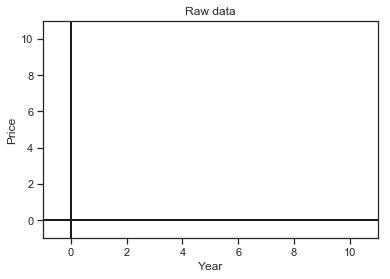

In [269]:
#Scatter Plot w/o Jitter

t = sns.regplot(
    'Year',
    'Price',
    df_class,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

           Year     Price       Age
Year   1.000000  0.157361 -0.223658
Price  0.157361  1.000000 -0.121559
Age   -0.223658 -0.121559  1.000000


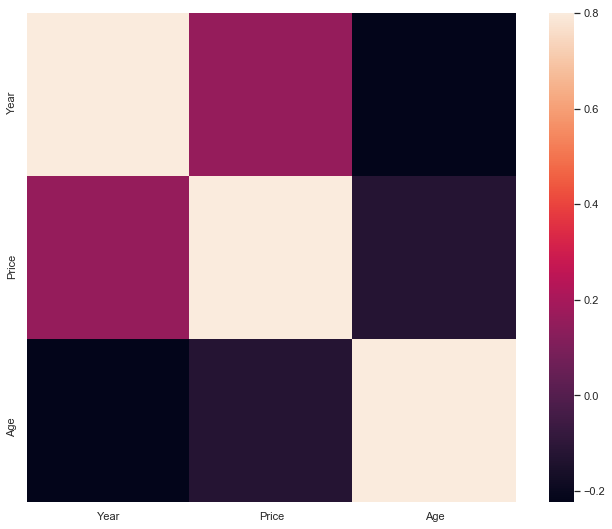

In [267]:
# Make the correlation matrix.
corrmat = df_class.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [268]:
# Tell seaborn about the structure of our data.

sns.set(style="ticks")  #Setting the overall aesthetic

g = sns.FacetGrid(df_class, row="Year", col="Price")
 
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "df_class", color="steelblue",  lw=0)

#Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)

#Making a more informative axis name.
g.set_axis_labels('Tip in USD')
plt.suptitle('Plot 2: Meal Tips by Gender and Time')
 
#Removing excess lines around the plot.
sns.despine()

ValueError: Image size of 65880x432 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000021CB82E8AE8> (for post_execute):


ValueError: Image size of 65880x432 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 65880x432 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 65880x432 with 610 Axes>

In [ ]:
# Descriptive statistics by group.
print(df_class.groupby('Year').describe())



In [270]:
# Test whether group differences are significant.
for col in df_class.loc[:,'Price':'Age'].columns:
    print(col)
    print(stats.ttest_ind(
        df_class[df_class['Year'] == 2018][col].dropna(),
        df_class[df_class['Year'] == 2019][col].dropna()
    ))

Price
Ttest_indResult(statistic=-3.2461280761689184, pvalue=0.0012647417709810676)
Age
Ttest_indResult(statistic=4.708356298603566, pvalue=3.395261330092836e-06)
